In [537]:
# NOTES:
# 2.Feature Selection: Research other features that can be added to the dataframe
# 3.Remove columns that have total counts instead of percentages (i.e FGP vs FGM or FGA) if not valid
# 4.Look at correlation of all columns (especially after creating new ones from research)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# to ignore the warnings
from warnings import filterwarnings

In [538]:
game_statistics_df = pd.read_csv('./data/gameStatistics.csv')
game_statistics_df.head()

,visitor_fastBreakPoints,visitor_pointsInPaint,visitor_biggestLead,visitor_secondChancePoints,visitor_pointsOffTurnovers,visitor_longestRun,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,...,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_plusMinus,home_min,home_team
0,12.0,82.0,17.0,24.0,16.0,13.0,142.0,53.0,105.0,50.5,...,28.0,43.0,29.0,33.0,7.0,11.0,9.0,6.0,290:00,Houston Rockets
1,7.0,38.0,33.0,4.0,16.0,11.0,114.0,41.0,76.0,53.9,...,30.0,42.0,20.0,21.0,6.0,16.0,2.0,-18.0,240:00,Sacramento Kings
2,13.0,32.0,14.0,22.0,25.0,12.0,98.0,36.0,93.0,38.7,...,36.0,42.0,24.0,21.0,9.0,16.0,5.0,8.0,240:00,LA Clippers
3,0.0,46.0,6.0,16.0,8.0,9.0,116.0,46.0,89.0,51.7,...,34.0,45.0,18.0,20.0,4.0,11.0,4.0,-3.0,240:00,Oklahoma City Thunder
4,16.0,42.0,18.0,17.0,18.0,14.0,123.0,43.0,77.0,55.8,...,23.0,35.0,18.0,29.0,9.0,16.0,4.0,-13.0,240:00,Phoenix Suns


In [539]:
game_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visitor_fastBreakPoints     6191 non-null   float64
 1   visitor_pointsInPaint       6191 non-null   float64
 2   visitor_biggestLead         6191 non-null   float64
 3   visitor_secondChancePoints  6191 non-null   float64
 4   visitor_pointsOffTurnovers  6191 non-null   float64
 5   visitor_longestRun          6191 non-null   float64
 6   visitor_points              9510 non-null   float64
 7   visitor_fgm                 9510 non-null   float64
 8   visitor_fga                 9510 non-null   float64
 9   visitor_fgp                 9510 non-null   float64
 10  visitor_ftm                 9510 non-null   float64
 11  visitor_fta                 9510 non-null   float64
 12  visitor_ftp                 9510 non-null   float64
 13  visitor_tpm                 9510 

In [540]:
# Convert values in percentage columns to decimal form
game_statistics_df[['visitor_ftp', 'visitor_fgp', 'visitor_tpp', 'home_ftp', 'home_fgp','home_tpp']] = game_statistics_df[
    ['visitor_ftp', 
     'visitor_fgp', 
     'visitor_tpp', 
     'home_ftp', 
     'home_fgp',
     'home_tpp']
    ].apply(lambda x: x / 100)

In [541]:
# Drop irrelevant columns
game_statistics_df = game_statistics_df.drop(columns=['visitor_fastBreakPoints', 'visitor_pointsInPaint',
       'visitor_biggestLead', 'visitor_secondChancePoints',
       'visitor_pointsOffTurnovers', 'visitor_longestRun','visitor_plusMinus',
       'visitor_min','home_fastBreakPoints',
       'home_pointsInPaint', 'home_biggestLead', 'home_secondChancePoints',
       'home_pointsOffTurnovers', 'home_longestRun','home_plusMinus', 'home_min'])

# Display
game_statistics_df.head()

,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_team
0,142.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,25.0,0.400,...,0.346,15.0,28.0,43.0,29.0,33.0,7.0,11.0,9.0,Houston Rockets
1,114.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,30.0,0.467,...,0.375,12.0,30.0,42.0,20.0,21.0,6.0,16.0,2.0,Sacramento Kings
2,98.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,33.0,0.333,...,0.357,6.0,36.0,42.0,24.0,21.0,9.0,16.0,5.0,LA Clippers
3,116.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,34.0,0.441,...,0.312,11.0,34.0,45.0,18.0,20.0,4.0,11.0,4.0,Oklahoma City Thunder
4,123.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,24.0,0.417,...,0.370,12.0,23.0,35.0,18.0,29.0,9.0,16.0,4.0,Phoenix Suns


In [542]:
game_statistics_df.isnull().sum()

visitor_points       2
visitor_fgm          2
visitor_fga          2
visitor_fgp          2
visitor_ftm          2
visitor_fta          2
visitor_ftp          2
visitor_tpm          2
visitor_tpa          2
visitor_tpp          2
visitor_offReb       2
visitor_defReb       2
visitor_totReb       2
visitor_assists      2
visitor_pFouls       2
visitor_steals       2
visitor_turnovers    2
visitor_blocks       2
game_id              0
visitor_team         0
home_points          2
home_fgm             2
home_fga             2
home_fgp             2
home_ftm             2
home_fta             2
home_ftp             2
home_tpm             2
home_tpa             2
home_tpp             2
home_offReb          2
home_defReb          2
home_totReb          2
home_assists         2
home_pFouls          2
home_steals          2
home_turnovers       2
home_blocks          2
home_team            0
dtype: int64

In [543]:
df = game_statistics_df.dropna()

# Feature Engineering

In [544]:
# Look at columns of data frame
df.columns

Index(['visitor_points', 'visitor_fgm', 'visitor_fga', 'visitor_fgp',
       'visitor_ftm', 'visitor_fta', 'visitor_ftp', 'visitor_tpm',
       'visitor_tpa', 'visitor_tpp', 'visitor_offReb', 'visitor_defReb',
       'visitor_totReb', 'visitor_assists', 'visitor_pFouls', 'visitor_steals',
       'visitor_turnovers', 'visitor_blocks', 'game_id', 'visitor_team',
       'home_points', 'home_fgm', 'home_fga', 'home_fgp', 'home_ftm',
       'home_fta', 'home_ftp', 'home_tpm', 'home_tpa', 'home_tpp',
       'home_offReb', 'home_defReb', 'home_totReb', 'home_assists',
       'home_pFouls', 'home_steals', 'home_turnovers', 'home_blocks',
       'home_team'],
      dtype='object')

In [545]:
# Create win_pct column
# A second dataframe will have to be used to merge to the above data frame
# Both will be merged on the column 'game_id' so that the dates can be used
# Read in game scores data
game_score_df = pd.read_excel('./data/apiGameScores.xlsx') 
game_score_df.head()

,game_ids,date,visitor,home,visitor_points,home_points
0,319,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,1300,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,1344,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,1353,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,1376,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [546]:
df['game_id'].values

array([ 3459,  3462,  3461, ..., 14574, 14575, 14576], dtype=int64)

In [547]:
game_score_df['game_ids'].values

array([  319,  1300,  1344, ..., 11527, 13430, 14741], dtype=int64)

In [548]:
merged_df = pd.merge(left=game_score_df, right=df, left_on='game_ids', right_on='game_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9510 entries, 0 to 9509
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_ids           9510 non-null   int64  
 1   date               9510 non-null   object 
 2   visitor            9510 non-null   object 
 3   home               9510 non-null   object 
 4   visitor_points_x   9510 non-null   float64
 5   home_points_x      9510 non-null   float64
 6   visitor_points_y   9510 non-null   float64
 7   visitor_fgm        9510 non-null   float64
 8   visitor_fga        9510 non-null   float64
 9   visitor_fgp        9510 non-null   float64
 10  visitor_ftm        9510 non-null   float64
 11  visitor_fta        9510 non-null   float64
 12  visitor_ftp        9510 non-null   float64
 13  visitor_tpm        9510 non-null   float64
 14  visitor_tpa        9510 non-null   float64
 15  visitor_tpp        9510 non-null   float64
 16  visitor_offReb     9510 

In [549]:
merged_df.columns

Index(['game_ids', 'date', 'visitor', 'home', 'visitor_points_x',
       'home_points_x', 'visitor_points_y', 'visitor_fgm', 'visitor_fga',
       'visitor_fgp', 'visitor_ftm', 'visitor_fta', 'visitor_ftp',
       'visitor_tpm', 'visitor_tpa', 'visitor_tpp', 'visitor_offReb',
       'visitor_defReb', 'visitor_totReb', 'visitor_assists', 'visitor_pFouls',
       'visitor_steals', 'visitor_turnovers', 'visitor_blocks', 'game_id',
       'visitor_team', 'home_points_y', 'home_fgm', 'home_fga', 'home_fgp',
       'home_ftm', 'home_fta', 'home_ftp', 'home_tpm', 'home_tpa', 'home_tpp',
       'home_offReb', 'home_defReb', 'home_totReb', 'home_assists',
       'home_pFouls', 'home_steals', 'home_turnovers', 'home_blocks',
       'home_team'],
      dtype='object')

In [550]:
# After merging, columns with same names are redundant and should be dropped
merged_df = merged_df.drop(columns=['visitor_points_y', 'home_points_y', 'home', 'visitor', 'game_ids', 'game_id'])


In [551]:
merged_df = merged_df.rename(columns={'visitor_points_x': 'visitor_points',
                         'home_points_x': 'home_points'})
merged_df.head()

,date,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_team
0,2018-11-24T00:30:00.000Z,114.0,96.0,42.0,91.0,0.462,17.0,21.0,0.810,13.0,...,0.171,5.0,35.0,40.0,22.0,26.0,9.0,20.0,7.0,Atlanta Hawks
1,2019-01-20T00:30:00.000Z,113.0,105.0,39.0,88.0,0.443,23.0,25.0,0.920,12.0,...,0.293,13.0,36.0,49.0,28.0,20.0,8.0,20.0,6.0,Atlanta Hawks
2,2020-02-04T00:30:00.000Z,123.0,115.0,48.0,90.0,0.533,15.0,17.0,0.882,12.0,...,0.400,6.0,26.0,32.0,22.0,19.0,9.0,17.0,6.0,Atlanta Hawks
3,2021-02-25T00:30:00.000Z,112.0,127.0,42.0,95.0,0.442,20.0,23.0,0.870,8.0,...,0.548,12.0,33.0,45.0,27.0,23.0,4.0,17.0,5.0,Atlanta Hawks
4,2021-11-18T00:30:00.000Z,99.0,110.0,37.0,84.0,0.440,14.0,17.0,0.824,11.0,...,0.351,6.0,34.0,40.0,28.0,17.0,9.0,11.0,4.0,Atlanta Hawks


In [552]:
merged_df.date.dtype

dtype('O')

In [553]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['season'] = merged_df['date'].apply(lambda x: x.year if x.month < 7 else x.year + 1)
df = merged_df.copy()

In [554]:
# Track team wins based on season
team_stats = {}
for team in df['home_team'].unique():
    team_stats[team] = {} 

In [555]:
team_stats

{'Atlanta Hawks': {},
 'Boston Celtics': {},
 'Brooklyn Nets': {},
 'Charlotte Hornets': {},
 'Chicago Bulls': {},
 'Cleveland Cavaliers': {},
 'Dallas Mavericks': {},
 'Denver Nuggets': {},
 'Detroit Pistons': {},
 'Golden State Warriors': {},
 'Houston Rockets': {},
 'Indiana Pacers': {},
 'LA Clippers': {},
 'Los Angeles Lakers': {},
 'Memphis Grizzlies': {},
 'Miami Heat': {},
 'Milwaukee Bucks': {},
 'Minnesota Timberwolves': {},
 'New Orleans Pelicans': {},
 'New York Knicks': {},
 'Oklahoma City Thunder': {},
 'Orlando Magic': {},
 'Philadelphia 76ers': {},
 'Phoenix Suns': {},
 'Portland Trail Blazers': {},
 'Sacramento Kings': {},
 'San Antonio Spurs': {},
 'Toronto Raptors': {},
 'Utah Jazz': {},
 'Washington Wizards': {}}

In [556]:
df = df.sort_values('date')

df['home_team_win_pct'] = 0.0
df['visitor_team_win_pct'] = 0.0

for index, row in df.iterrows():
    season = row['season']
    home_team = row['home_team']
    visitor_team = row['visitor_team']
    
    if season not in team_stats[home_team]:
        team_stats[home_team][season] = {'wins': 0, 'games': 0}
    if season not in team_stats[visitor_team]:
        team_stats[visitor_team][season] = {'wins': 0, 'games': 0}
    
    # Update games played
    team_stats[home_team][season]['games'] += 1
    team_stats[visitor_team][season]['games'] += 1
    
    if row['home_points'] > row['visitor_points']:
        team_stats[home_team][season]['wins'] += 1
    else:
        team_stats[visitor_team][season]['wins'] += 1
    
# Win percentage
df.at[index, 'home_team_win_pct'] = (team_stats[home_team][season]['wins'] / team_stats[home_team][season]['games'])
df.at[index, 'visitor_team_win_pct'] = (team_stats[visitor_team][season]['wins'] / team_stats[visitor_team][season]['games'])

In [557]:
# Calculate Defensive Rebound Percentage
# High DRB%: Typically 78% or higher
# Average DRB%: Around 73% to 77%
# Low DRB%: 72% or lower
df['visitor_drb%'] = df['visitor_defReb'] / (df['visitor_defReb'] + df['home_offReb'])
df['home_drb%'] = df['home_defReb'] / (df['home_defReb'] + df['visitor_offReb'])

In [558]:
# Calculate Offensive Rebound Percentage
# High ORB%: 30% or higher
# Average ORB%: 20% and 27%
# Low ORB%: 19% or lower
df['visitor_orb%'] = df['visitor_offReb'] / (df['visitor_offReb'] + df['home_defReb'])
df['home_orb%'] = df['home_offReb'] / (df['home_offReb'] + df['visitor_defReb'])

In [559]:
# Calculate Free Throw Attempt Rate
# FTA Rate measures how often a team gets to the free-throw line relative to its field-goal attempts.
# An FTA Rate of around 0.2–0.3 is typical for NBA teams, but elite teams may exceed this range.
# It indicates how aggressive a team is in drawing fouls and earning free throws.
df['visitor_fta_rate'] = df['visitor_fta'] / df['visitor_fga']
df['home_fta_rate'] = df['home_fta'] / df['home_fga']

In [560]:
# Benchmarks for TO% in the NBA:
# Excellent: Less than 12%
# Teams that excel at ball control and avoid turnovers.
# Good: 12% to 14%
# Solid ball-handling and decision-making.
# Average: 14% to 16%
# Typical for most teams; manageable turnovers without being costly.
# Poor: Greater than 16%
# Indicates sloppy play or excessive risk-taking.

# Calculate number of possessions
df['visitor_possessions'] = (
    df['visitor_fga'] + 0.44  * df['visitor_fta'] - df['visitor_offReb'] + df['visitor_turnovers']
    )
df['home_possessions'] = (
    df['home_fga'] + 0.44  * df['home_fta'] - df['home_offReb'] + df['home_turnovers']
    )

# Calculate turn over percentage
df['visitor_to%'] = (df['visitor_turnovers'] / df['visitor_possessions'])
df['home_to%'] = (df['home_turnovers'] / df['home_possessions'])

In [561]:
# Calculate Offensive Rating (ORtg)
df['visitor_ORtg'] = (df['visitor_points'] / df['visitor_possessions']) * 100
df['home_ORtg'] = (df['home_points'] / df['home_possessions']) * 100

# Calculate Defensive Rating (DRtg)
df['visitor_DRtg'] = (df['home_points'] / df['visitor_possessions']) * 100
df['home_DRtg'] = (df['visitor_points'] / df['home_possessions']) * 100


In [562]:
# Calculate Turn Over Ratio (TO)
# (TO * 100) / (FGA + (FTA * 0.44) + AST + TO)
df['visitor_turn_over_ratio'] = (df['visitor_turnovers'] * 100) / (df['visitor_fga'] + ((df['visitor_fta']) * 0.44) + df['visitor_assists'] + df['visitor_turnovers'])
df['home_turn_over_ratio'] = (df['home_turnovers'] * 100) / (df['home_fga'] + ((df['home_fta']) * 0.44) + df['home_assists'] + df['home_turnovers'])

In [563]:
# Create a column for both the home team and visitor team to calculate effective field goal percentage
# EFG - A statistics that adjust field goal percentage to show that three point shots are worth more than two point shots
df['visitor_efg%'] = (df['visitor_fgm'] + (0.5 * df['visitor_tpm'])) / df['visitor_fga']
df['home_efg%'] = (df['home_fgm'] + (0.5 * df['home_tpm'])) / df['home_fga']


# Measures the teams efficiency at shooting the ball
# Calculate the teams True Shooting Percentage
df['visitor_ts%'] = (df['visitor_points'] / (2 * (df['visitor_fga'] + (0.44 * df['visitor_fta']))))
df['home_ts%'] = (df['home_points'] / (2 * (df['home_fga'] + (0.44 * df['home_fta']))))

In [564]:
# df['points_diff'] = df['home_points'] - df['visitor_points']
# df['rebounds_diff'] = df['home_totReb'] - df['visitor_totReb']
# df['turnovers_diff'] = df['home_turnovers'] - df['visitor_turnovers']

In [565]:
# Display
df.head()

,date,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,visitor_ORtg,home_ORtg,visitor_DRtg,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%
7150,2018-01-01 00:00:00+00:00,114.0,96.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,...,118.061309,95.049505,99.420050,112.871287,12.845215,12.030075,0.631579,0.482558,0.658503,0.494845
2023,2018-01-01 00:00:00+00:00,98.0,106.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,...,94.814241,108.295872,102.554180,100.122599,12.026033,12.511730,0.446237,0.539474,0.483425,0.603095
5415,2018-01-01 00:00:00+00:00,142.0,148.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,...,118.057865,124.202753,123.046225,119.167506,8.419533,6.741848,0.552381,0.547170,0.585422,0.600844
3642,2018-01-01 00:00:00+00:00,116.0,113.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,...,123.194562,114.003228,120.008496,117.029863,5.461923,8.585701,0.601124,0.539326,0.609500,0.570016
8906,2018-01-01 01:00:00+00:00,123.0,110.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,...,120.635543,102.842184,107.885445,114.996260,15.332944,11.682243,0.623377,0.477273,0.668769,0.534188


In [566]:
# Export both Dataframes for model 4
# Includes feature engineered columns
df.to_csv('./data/nbaFeaturedEngineered.csv', index=False)

# Correlation Analysis

In [567]:
# Create first target column 'winner'
df['home_win'] = df.apply(
    lambda row: 1 if row['home_points'] > row['visitor_points'] else 0,
    axis=1
)
# Create second target column 'total_points'
df['total_points'] = df['home_points'] + df['visitor_points']

# Display
df.head()

,date,visitor_points,home_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,visitor_DRtg,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,home_win,total_points
7150,2018-01-01 00:00:00+00:00,114.0,96.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,...,99.420050,112.871287,12.845215,12.030075,0.631579,0.482558,0.658503,0.494845,0,210.0
2023,2018-01-01 00:00:00+00:00,98.0,106.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,...,102.554180,100.122599,12.026033,12.511730,0.446237,0.539474,0.483425,0.603095,1,204.0
5415,2018-01-01 00:00:00+00:00,142.0,148.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,...,123.046225,119.167506,8.419533,6.741848,0.552381,0.547170,0.585422,0.600844,1,290.0
3642,2018-01-01 00:00:00+00:00,116.0,113.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,...,120.008496,117.029863,5.461923,8.585701,0.601124,0.539326,0.609500,0.570016,0,229.0
8906,2018-01-01 01:00:00+00:00,123.0,110.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,...,107.885445,114.996260,15.332944,11.682243,0.623377,0.477273,0.668769,0.534188,0,233.0


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9510 entries, 7150 to 8946
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   date                     9510 non-null   datetime64[ns, UTC]
 1   visitor_points           9510 non-null   float64            
 2   home_points              9510 non-null   float64            
 3   visitor_fgm              9510 non-null   float64            
 4   visitor_fga              9510 non-null   float64            
 5   visitor_fgp              9510 non-null   float64            
 6   visitor_ftm              9510 non-null   float64            
 7   visitor_fta              9510 non-null   float64            
 8   visitor_ftp              9510 non-null   float64            
 9   visitor_tpm              9510 non-null   float64            
 10  visitor_tpa              9510 non-null   float64            
 11  visitor_tpp              9510 no

<Axes: xlabel='visitor_orb%', ylabel='total_points'>

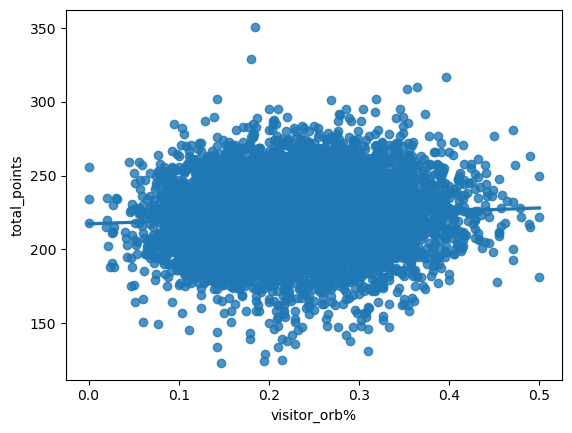

In [569]:
sns.regplot(data=df, x='visitor_orb%', y='total_points')

<Axes: xlabel='visitor_drb%', ylabel='total_points'>

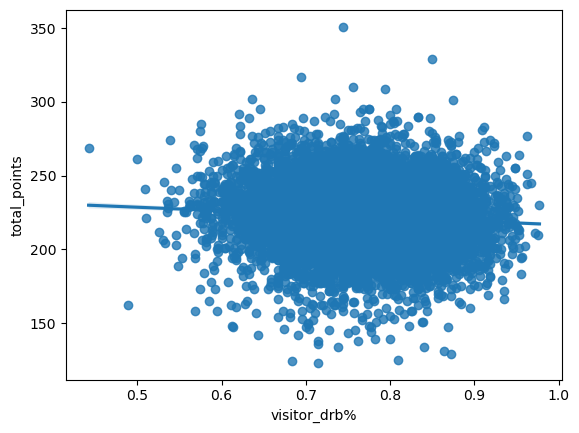

In [570]:
sns.regplot(data=df, x='visitor_drb%', y='total_points')


<Axes: xlabel='visitor_to%', ylabel='total_points'>

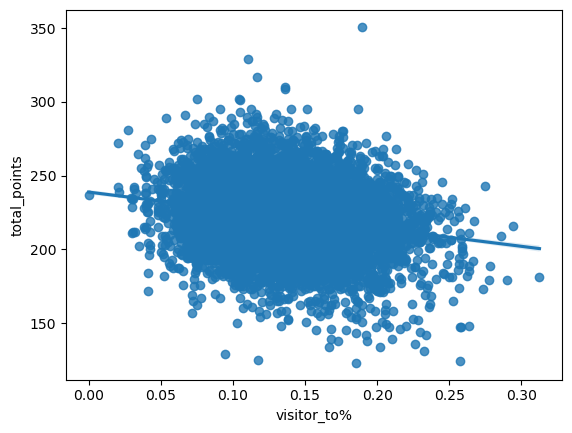

In [571]:
sns.regplot(data=df, x='visitor_to%', y='total_points')

<Axes: xlabel='visitor_efg%', ylabel='total_points'>

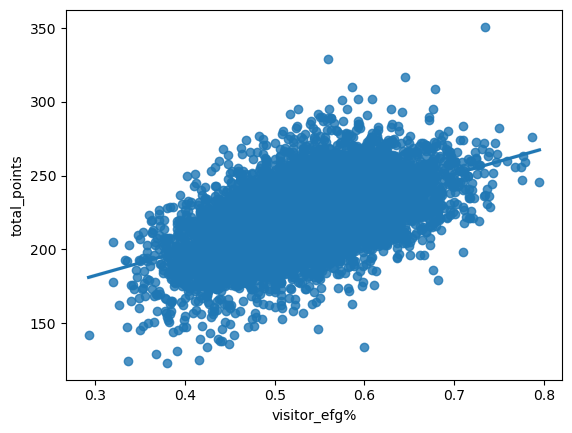

In [572]:
sns.regplot(data=df, x='visitor_efg%', y='total_points')

<Axes: xlabel='visitor_fgm', ylabel='total_points'>

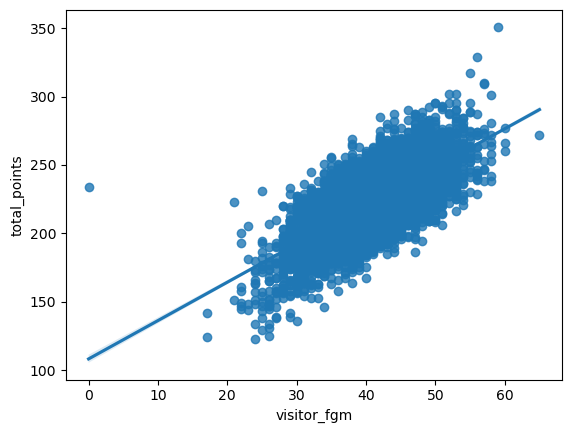

In [573]:
sns.regplot(data=df, x='visitor_fgm', y='total_points')


<Axes: xlabel='visitor_tpp', ylabel='total_points'>

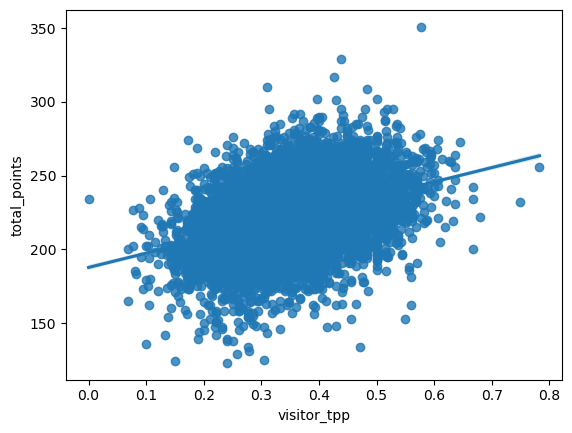

In [574]:
sns.regplot(data=df, x='visitor_tpp', y='total_points')


# Total Points Target

In [575]:
# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)['total_points'].sort_values(ascending=False)
correlations

total_points               1.000000
visitor_points             0.828978
home_points                0.828474
visitor_fgm                0.703025
home_fgm                   0.683882
                             ...   
visitor_defReb            -0.129411
home_to%                  -0.194313
visitor_to%               -0.214333
home_turn_over_ratio      -0.225793
visitor_turn_over_ratio   -0.249523
Name: total_points, Length: 61, dtype: float64

In [576]:
# Set target column
target_column = 'total_points'

# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)[target_column]

# Set conditions to find feature columns
feature_columns = correlations[correlations > 0.6]

# Create new data frame with chosen feature columns
total_df = df[feature_columns.index]

# Add 'visitor_team' and 'home_team' to the new DataFrame
total_df = pd.concat([df[['home_team', 'visitor_team']], total_df], axis=1)
total_df

,home_team,visitor_team,visitor_points,home_points,visitor_fgm,home_fgm,visitor_ORtg,home_ORtg,visitor_DRtg,home_DRtg,total_points
7150,Sacramento Kings,Memphis Grizzlies,114.0,96.0,41.0,37.0,118.061309,95.049505,99.420050,112.871287,210.0
2023,LA Clippers,Charlotte Hornets,98.0,106.0,36.0,36.0,94.814241,108.295872,102.554180,100.122599,204.0
5415,Houston Rockets,Los Angeles Lakers,142.0,148.0,53.0,49.0,118.057865,124.202753,123.046225,119.167506,290.0
3642,Oklahoma City Thunder,Dallas Mavericks,116.0,113.0,46.0,43.0,123.194562,114.003228,120.008496,117.029863,229.0
8906,Phoenix Suns,Philadelphia 76ers,123.0,110.0,43.0,37.0,120.635543,102.842184,107.885445,114.996260,233.0
...,...,...,...,...,...,...,...,...,...,...,...
8501,Utah Jazz,New York Knicks,103.0,119.0,47.0,39.0,100.861731,112.689394,116.529573,97.537879,222.0
1796,Brooklyn Nets,Toronto Raptors,113.0,130.0,52.0,42.0,116.832093,124.045802,134.408602,107.824427,243.0
3412,Dallas Mavericks,Houston Rockets,99.0,110.0,42.0,40.0,90.725806,114.535610,100.806452,103.082049,209.0
163,Atlanta Hawks,Denver Nuggets,120.0,139.0,53.0,45.0,106.913756,124.955052,123.841768,107.874865,259.0


In [577]:
total_df.loc[(total_df['home_team'] == 'Houston Rockets') & (total_df['visitor_team'] == 'Los Angeles Lakers')].shape

(14, 11)

# Winner Target

In [588]:
# Look for correlation between columns and 'home_win' column
correlations = df.corr(numeric_only=True)['home_win'].sort_values(ascending=False)
correlations

home_win          1.000000
home_ORtg         0.499813
visitor_DRtg      0.482578
home_ts%          0.471614
home_points       0.450292
                    ...   
visitor_efg%     -0.137799
visitor_points   -0.441567
visitor_ts%      -0.470026
home_DRtg        -0.486003
visitor_ORtg     -0.500126
Name: home_win, Length: 61, dtype: float64

In [579]:
# Set target column
target_column = 'home_win'

# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)[target_column]

# Set conditions to find feature columns
feature_columns = correlations[(correlations <= -0.46) | (correlations >= 0.44)]

# Create new data frame with chosen feature columns
winner_df = df[feature_columns.index]

# Add 'visitor_team' and 'home_team' to the new DataFrame
winner_df = pd.concat([df[['home_team', 'visitor_team']], winner_df], axis=1)
winner_df

,home_team,visitor_team,home_points,visitor_ORtg,home_ORtg,visitor_DRtg,home_DRtg,visitor_ts%,home_ts%,home_win
7150,Sacramento Kings,Memphis Grizzlies,96.0,118.061309,95.049505,99.420050,112.871287,0.658503,0.494845,0
2023,LA Clippers,Charlotte Hornets,106.0,94.814241,108.295872,102.554180,100.122599,0.483425,0.603095,1
5415,Houston Rockets,Los Angeles Lakers,148.0,118.057865,124.202753,123.046225,119.167506,0.585422,0.600844,1
3642,Oklahoma City Thunder,Dallas Mavericks,113.0,123.194562,114.003228,120.008496,117.029863,0.609500,0.570016,0
8906,Phoenix Suns,Philadelphia 76ers,110.0,120.635543,102.842184,107.885445,114.996260,0.668769,0.534188,0
...,...,...,...,...,...,...,...,...,...,...
8501,Utah Jazz,New York Knicks,119.0,100.861731,112.689394,116.529573,97.537879,0.541421,0.579922,1
1796,Brooklyn Nets,Toronto Raptors,130.0,116.832093,124.045802,134.408602,107.824427,0.602860,0.678497,1
3412,Dallas Mavericks,Houston Rockets,110.0,90.725806,114.535610,100.806452,103.082049,0.499395,0.670405,1
163,Atlanta Hawks,Denver Nuggets,139.0,106.913756,124.955052,123.841768,107.874865,0.581170,0.636214,1


In [580]:
# Export both Dataframes for model 3 
total_df.to_csv('./data/totalPredict_ML3.csv', index=False)
winner_df.to_csv('./data/winPredict_ML3.csv', index=False)